# POS-Tagging

A simple example animating the tagging of individual parts of speech.

{'DET': 0, 'ADJ': 1, 'NOUN': 2, 'VERB': 3, 'PREP': 4}


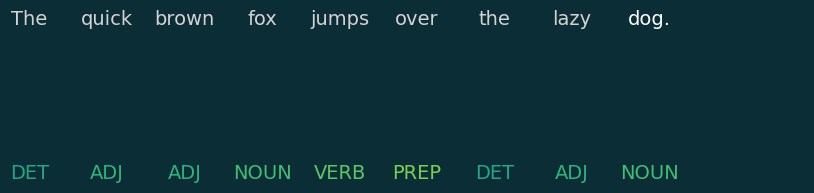

In [25]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.text import Text
import numpy as np

# Define the sentence and its corresponding POS tags
sentence = "The quick brown fox jumps over the lazy dog.".split()
pos_tags = ["DET", "ADJ", "ADJ", "NOUN", "VERB", "PREP", "DET", "ADJ", "NOUN"]

tagmap = {}
idx = 0
for tag in pos_tags:
    if not tag in tagmap:
        tagmap[tag] = idx
        idx += 1
print(tagmap)

# Create a figure and axis with a black background
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_facecolor('#0B2D36')
fig.patch.set_facecolor('#0B2D36')
ax.set_axis_off()

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0.6, 0.99, len(sentence)))

# Initial text objects
texts = []
pos_texts = []

# Create initial text objects with white text on a black background
for i, word in enumerate(sentence):
    text = ax.text(x=i*0.1, y=1, s=word, fontsize=14, ha='center', color='white')
    texts.append(text)
    pos_text = ax.text(x=i*0.1, y=0, s="", fontsize=14, ha='center', color=colors[tagmap[pos_tags[i]]])
    pos_texts.append(pos_text)

# Function to update the frame for each step
def update(frame):
    # Reset all colors to gray
    for text in texts:
        text.set_color('lightgray')

    # Highlight the current word in white
    texts[frame].set_color('white')

    # Display the corresponding POS tag in cyan
    pos_texts[frame].set_text(pos_tags[frame])

    return texts + pos_texts

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(sentence), interval=800, blit=True, repeat=False)

# Save the animation as a GIF with a black background
ani.save("pos_tagging_animation_black_bg.gif", writer="pillow", fps=1.25, savefig_kwargs={'facecolor':'#0B2D36'})

# Display the animation
plt.show()


# Example for Sequence Labeling: Protein Secondary Structure

Protein secondary structure refers to the local folded shapes within a protein, primarily alpha-helices and beta-sheets, stabilized by hydrogen bonds. Predicting these structures from the amino acid sequence helps in understanding a protein's function and interactions, which is crucial in fields like drug design and molecular biology.

**Amino Acids in Proteins:**

1. **Alanine (Ala, A)**
2. **Arginine (Arg, R)**
3. **Asparagine (Asn, N)**
4. **Aspartic acid (Asp, D)**
5. **Cysteine (Cys, C)**
6. **Glutamine (Gln, Q)**
7. **Glutamic acid (Glu, E)**
8. **Glycine (Gly, G)**
9. **Histidine (His, H)**
10. **Isoleucine (Ile, I)**
11. **Leucine (Leu, L)**
12. **Lysine (Lys, K)**
13. **Methionine (Met, M)**
14. **Phenylalanine (Phe, F)**
15. **Proline (Pro, P)**
16. **Serine (Ser, S)**
17. **Threonine (Thr, T)**
18. **Tryptophan (Trp, W)**
19. **Tyrosine (Tyr, Y)**
20. **Valine (Val, V)**


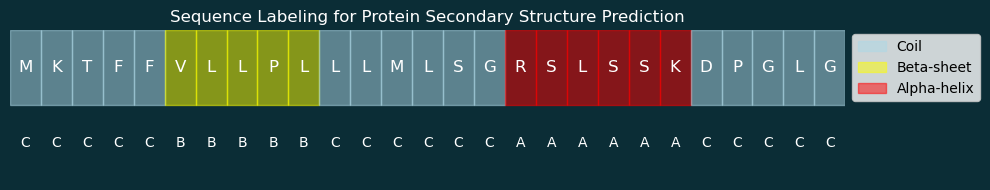

In [12]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Define a simple amino acid sequence and its corresponding secondary structure labels
sequence  = "MKTFFVLLPLLLMLSGRSLSSKDPGLG"
structure = "CCCCCEEEEECCCCCCHHHHHHCCCCC"  # C: Coil, E: Beta-sheet, H: Alpha-helix

# Colors for different secondary structures
structure_colors = {'C': 'lightblue', 'E': 'yellow', 'H': 'red'}
structure_labels = {'C': 'Coil', 'E': 'Beta-sheet', 'H': 'Alpha-helix'}

# Create a plot
fig, ax = plt.subplots(figsize=(10, 2))

ax.set_facecolor('#0B2D36')
fig.patch.set_facecolor('#0B2D36')

# Draw the amino acid sequence as text
for i, amino_acid in enumerate(sequence):
    ax.text(i + 0.5, 0.5, amino_acid, ha='center', va='center', fontsize=12, color='white')

# Draw the secondary structure labels with colored backgrounds
for i, label in enumerate(structure):
    ax.add_patch(Rectangle((i, 0), 1, 1, color=structure_colors[label], alpha=0.5))
    ax.text(i + 0.5, -0.5, structure_labels[label][0], ha='center', va='center', fontsize=10, color='white')

# Formatting
ax.set_xlim(0, len(sequence))
ax.set_ylim(-1, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

# Add a legend
legend_handles = [Rectangle((0, 0), 1, 1, color=structure_colors[label], alpha=0.5) for label in structure_colors]
ax.legend(legend_handles, [structure_labels[label] for label in structure_colors], loc='center left', bbox_to_anchor=(1, 0.75), fontsize=10)

plt.title('Sequence Labeling for Protein Secondary Structure Prediction', color='white')
plt.tight_layout()
plt.savefig("protein_structure.png", dpi=300)
plt.show()


# Sequence Labeling: Anomaly Detection

Based on a use-case during my position as a data scientist, the goal is to label individual user interactions with a web-tool of the company Amadeus as normal or suspicious. If a sequence of interactions has too many suspicious interactions, it is flagged as potentially malicious and investigated by their cybersecurity team. This work was part of the EU project DiSIEM.

MovieWriter imagemagick unavailable; using Pillow instead.


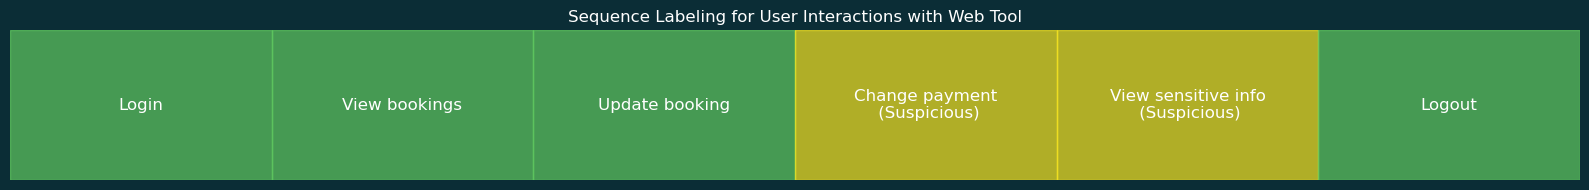

In [29]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
import numpy as np

# Define a sequence of user interactions and corresponding labels
sequence = [
    "Login",
    "View bookings",
    "Update booking",
    "Change payment",
    "View sensitive info",
    "Logout"
]

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0.6, 0.99, len(sequence)))

# Initial labels (these will change dynamically in the animation)
labels = ["normal", "normal", "normal", "normal", "normal", "normal"]
highlight_color = colors[5]

# Colors for different labels
label_colors = {'normal': colors[2], 'suspicious': highlight_color}

# Suspicious interactions (to be marked during the animation)
suspicious_indices = [3, 4]  # e.g., changing payment method followed by viewing sensitive info

# Setup the figure
fig, ax = plt.subplots(figsize=(16, 2))
ax.set_facecolor('#0B2D36')
fig.patch.set_facecolor('#0B2D36')

# Initialize patches and text
rects = []
texts = []

for i, action in enumerate(sequence):
    rect = Rectangle((i, 0), 1, 1, color=colors[0], alpha=0.7)
    rects.append(rect)
    ax.add_patch(rect)
    text = ax.text(i + 0.5, 0.5, action, ha='center', va='center', fontsize=12, color='white')
    texts.append(text)

# Formatting
ax.set_xlim(0, len(sequence))
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

# Animation function
def animate(i):
    if i in suspicious_indices:
        rects[i].set_color(label_colors['suspicious'])
        texts[i].set_text(f"{sequence[i]}\n (Suspicious)")
    else:
        rects[i].set_color(label_colors['normal'])
        texts[i].set_text(sequence[i])

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(sequence), interval=1000, repeat=False)

plt.title('Sequence Labeling for User Interactions with Web Tool', color='white')
plt.tight_layout()
ani.save('user_interactions.gif', writer='imagemagick', fps=1)
plt.show()


# Hidden Markov Models

Animate the hidden state probabilities given a sequence of observations for POS-tagging.

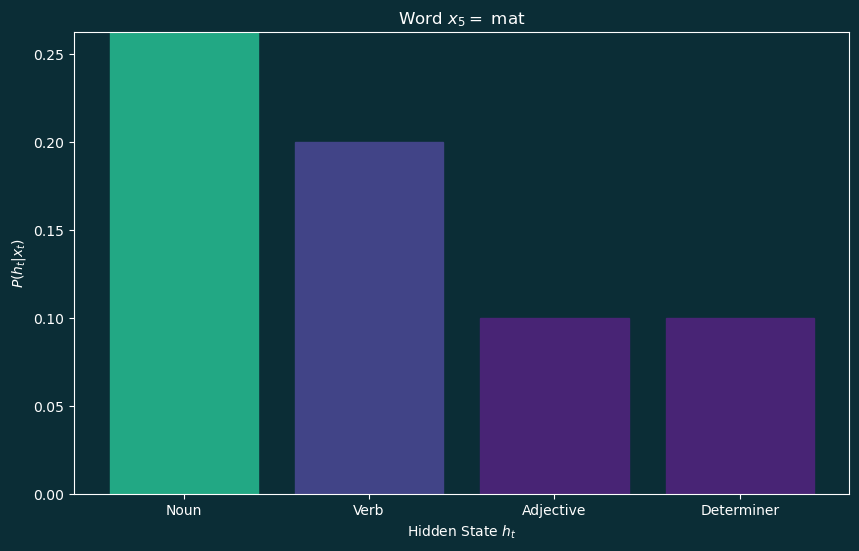

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.cm import viridis

# Define states and observations
states = ['Noun', 'Verb', 'Adjective', 'Determiner']
observations = ['The', 'cat', 'sat', 'on', 'the', 'mat']

# Transition and emission probabilities (simplified example)
transition_probs = np.array([[0.1, 0.7, 0.1, 0.1],  # Noun
                             [0.4, 0.1, 0.4, 0.1],  # Verb
                             [0.3, 0.3, 0.1, 0.3],  # Adjective
                             [0.6, 0.1, 0.1, 0.2]]) # Determiner

emission_probs = {
    'The': [0.1, 0.1, 0.2, 0.6],
    'cat': [0.6, 0.2, 0.1, 0.1],
    'sat': [0.1, 0.6, 0.1, 0.2],
    'on': [0.1, 0.1, 0.1, 0.7],
    'the': [0.1, 0.1, 0.2, 0.6],
    'mat': [0.6, 0.2, 0.1, 0.1]
}

# Initialize figure and axes with custom styles
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#0B2D36')
ax.set_facecolor('#0B2D36')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# Initial plot setup
bars = ax.bar(states, [0.25, 0.25, 0.25, 0.25], color=viridis(0.25))

# Set axis labels
ax.set_xlabel('Hidden State $h_t$', color='white')
ax.set_ylabel(r'$P(h_t|x_t)$', color='white')

# Set up the animation function
def update(frame):
    word = observations[frame]
    probabilities = emission_probs[word]
    for bar, prob in zip(bars, probabilities):
        bar.set_height(prob)
        bar.set_color(viridis(prob))
    ax.set_title(r'Word $x_{'+str(frame)+'} = $ ' + f"{word}", color='white')

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(observations), repeat=False)
ani.save('hmm_animation.gif', writer='pillow', fps=0.5)
plt.show()


### With a nice animation between observations...

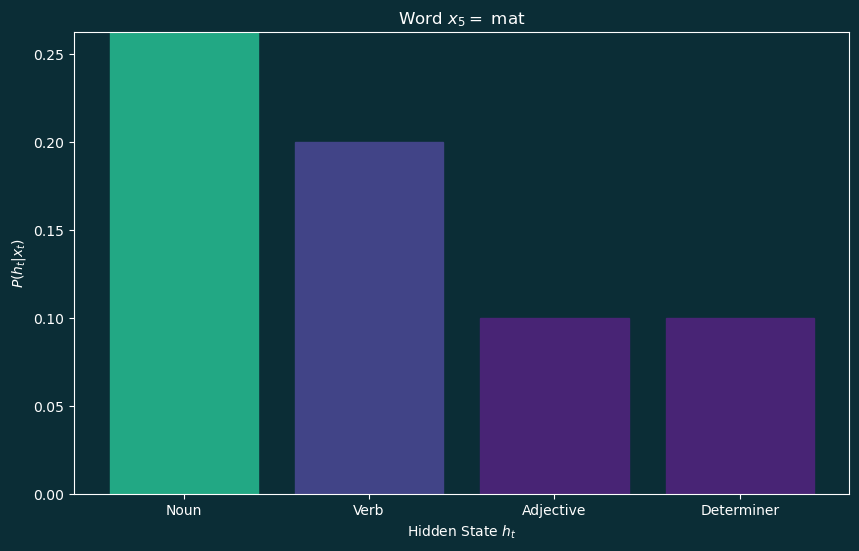

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.cm import viridis

# Define states and observations
states = ['Noun', 'Verb', 'Adjective', 'Determiner']
observations = ['The', 'cat', 'sat', 'on', 'the', 'mat']

# Transition and emission probabilities (simplified example)
transition_probs = np.array([[0.1, 0.7, 0.1, 0.1],  # Noun
                             [0.4, 0.1, 0.4, 0.1],  # Verb
                             [0.3, 0.3, 0.1, 0.3],  # Adjective
                             [0.6, 0.1, 0.1, 0.2]]) # Determiner

emission_probs = {
    'The': [0.1, 0.1, 0.2, 0.6],
    'cat': [0.6, 0.2, 0.1, 0.1],
    'sat': [0.1, 0.6, 0.1, 0.2],
    'on': [0.1, 0.1, 0.1, 0.7],
    'the': [0.1, 0.1, 0.2, 0.6],
    'mat': [0.6, 0.2, 0.1, 0.1]
}

# Initialize figure and axes with custom styles
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#0B2D36')
ax.set_facecolor('#0B2D36')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# Initial plot setup
bars = ax.bar(states, [0.25, 0.25, 0.25, 0.25], color=viridis(0.25))

# Set axis labels
ax.set_xlabel('Hidden State $h_t$', color='white')
ax.set_ylabel(r'$P(h_t|x_t)$', color='white')

# Set up the animation function with smooth transitions
def update(frame):
    t = frame // 10 # Change word every 10 frames
    word = observations[t]  
    start_probs = np.array([bar.get_height() for bar in bars])
    end_probs = np.array(emission_probs[word])

    # Linear interpolation between start and end probabilities
    interp_probs = start_probs + (end_probs - start_probs) * (frame % 10) / 9.0
    
    for bar, prob in zip(bars, interp_probs):
        bar.set_height(prob)
        bar.set_color(viridis(prob))
    ax.set_title(r'Word $x_{'+str(t)+'} = $ ' + f"{word}", color='white')

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(observations) * 10, repeat=False)
ani.save('hmm_animation_trans.gif', writer='pillow', fps=5)
plt.show()


# Rule-based POS-Tagging

First, a simple set of rules.

1. assign NOUN		if ( word ends in –tion ) or ( word ends in –ment ) 
2. assign VERB 		if ( word ends in –ing )


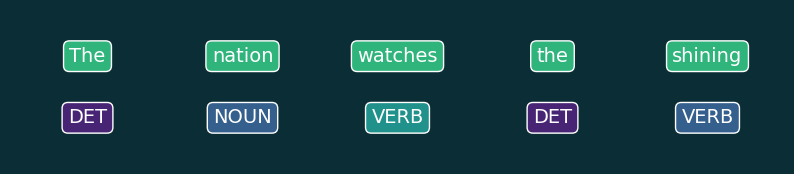

In [99]:
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

# Sentence and POS tags
words = ['The', 'nation', 'watches', 'the', 'shining']
tags = ['DET', 'NOUN', 'VERB', 'DET', 'VERB']

# Colors from viridis colormap
colors = viridis([0.1, 0.3, 0.5, 0.1, 0.3])
textcolor = viridis(0.65)

# Define figure and axis
fig, ax = plt.subplots(figsize=(10, 2))
fig.patch.set_facecolor('#0B2D36')
ax.set_facecolor('#0B2D36')

# Plot each word and its corresponding tag
for i, (word, tag, color) in enumerate(zip(words, tags, colors)):
    ax.text(i + 0.5, 0.7, word, ha='center', va='center', fontsize=14, color='white',
            bbox=dict(facecolor=textcolor, edgecolor='white', boxstyle='round,pad=0.3'))
    ax.text(i + 0.5, 0.3, tag, ha='center', va='center', fontsize=14, color='white',
            bbox=dict(facecolor=color, edgecolor='white', boxstyle='round,pad=0.3'))

# Customize the plot
ax.set_xlim(0, len(words))
ax.set_ylim(0, 1)
ax.axis('off')

# Display the illustration
plt.savefig("rulebased_simple.png", dpi=300)
plt.show()

Adding a transformation rule:

3. change tag to NOUN	if tag is VERB and word before is DET    

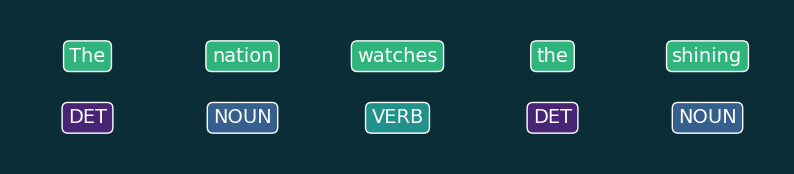

In [100]:
# Sentence and POS tags
words = ['The', 'nation', 'watches', 'the', 'shining']
tags = ['DET', 'NOUN', 'VERB', 'DET', 'NOUN']

# Colors from viridis colormap
colors = viridis([0.1, 0.3, 0.5, 0.1, 0.3])
textcolor = viridis(0.65)

# Define figure and axis
fig, ax = plt.subplots(figsize=(10, 2))
fig.patch.set_facecolor('#0B2D36')
ax.set_facecolor('#0B2D36')

# Plot each word and its corresponding tag
for i, (word, tag, color) in enumerate(zip(words, tags, colors)):
    ax.text(i + 0.5, 0.7, word, ha='center', va='center', fontsize=14, color='white',
            bbox=dict(facecolor=textcolor, edgecolor='white', boxstyle='round,pad=0.3'))
    ax.text(i + 0.5, 0.3, tag, ha='center', va='center', fontsize=14, color='white',
            bbox=dict(facecolor=color, edgecolor='white', boxstyle='round,pad=0.3'))

# Customize the plot
ax.set_xlim(0, len(words))
ax.set_ylim(0, 1)
ax.axis('off')

# Display the illustration
plt.savefig("rulebased_transition.png", dpi=300)
plt.show()

# LSTM

Visualizing the hidden state and output of an LSTM.

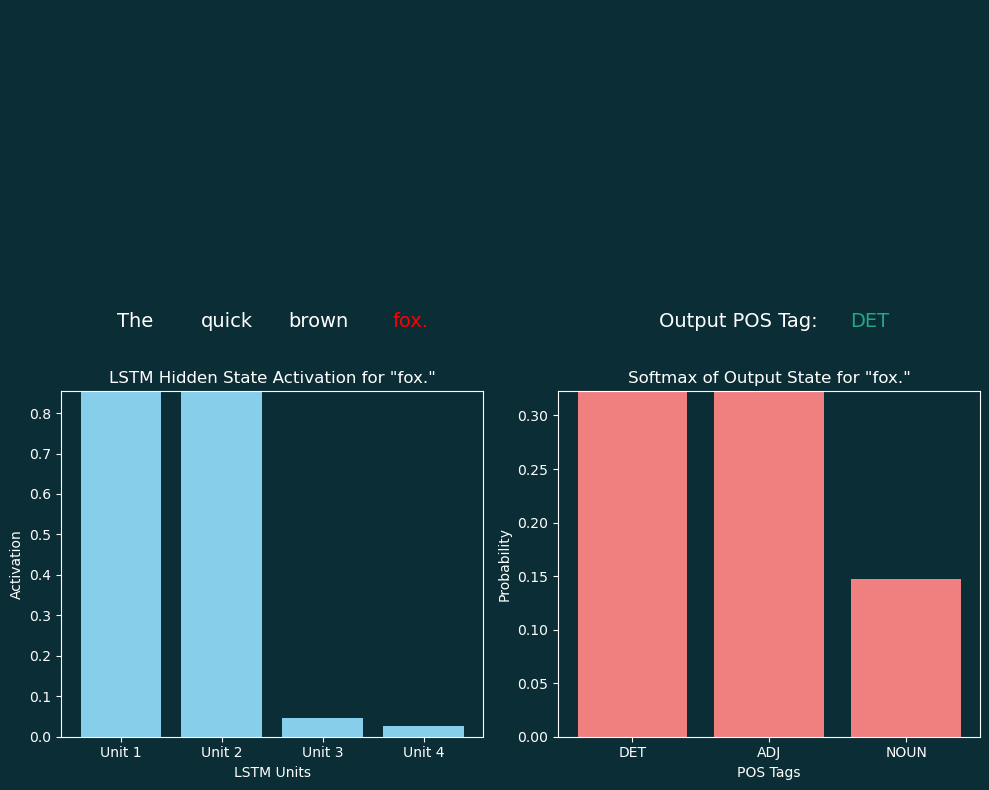

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.special import softmax

# Sequence and corresponding POS tags
sequence = ['The', 'quick', 'brown', 'fox.']
pos_tags = ['DET', 'ADJ', 'ADJ', 'NOUN']

# Number of LSTM units (example: 4 units)
n_units = 4

# Random hidden states (4 words, 4 units)
hidden_states = np.random.rand(len(sequence), n_units)


plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0.6, 0.99, 6))

fig = plt.figure(figsize=(10, 8))


# Create the first axis at the top (1 row, 1 column, 1st subplot)
ax_text = fig.add_subplot(2, 1, 1)

# Create the second axis below (2 rows, 2 columns, 1st subplot in second row)
ax_bar1 = fig.add_subplot(2, 2, 3)

# Create the third axis below (2 rows, 2 columns, 2nd subplot in second row)
ax_bar2 = fig.add_subplot(2, 2, 4)

ax = [ax_bar1, ax_bar2, ax_text]

ax[0].set_facecolor('#0B2D36')
ax[1].set_facecolor('#0B2D36')
ax[2].set_facecolor('#0B2D36')
fig.patch.set_facecolor('#0B2D36')

# Initialize the bar plots for hidden states and softmax probabilities
bars_hidden = ax[0].bar(range(n_units), hidden_states[0], color='skyblue')
ax[0].set_xlabel('LSTM Units')
ax[0].set_ylabel('Activation')
ax[0].set_title('LSTM Hidden State Activation')
ax[0].set_xticks(range(n_units))
ax[0].set_xticklabels([f'Unit {i+1}' for i in range(n_units)])

bars_softmax = ax[1].bar(pos_tags, softmax(hidden_states[0]), color='lightcoral')
ax[1].set_xlabel('POS Tags')
ax[1].set_ylabel('Probability')
ax[1].set_title('Softmax of Output State')

# Display sentence with highlighted current word
text_objects = [ax_text.text(0.08 + i*0.1, 0.1, word, ha='center', va='center', fontsize=14, color='white') for i, word in enumerate(sequence)]
output_textbefore = ax[2].text(0.74, 0.1, 'Output POS Tag: ', ha='center', va='center', fontsize=14, color='white')
output_text = ax[2].text(0.88, 0.1, '', ha='center', va='center', fontsize=14, color=colors[0])

# Hide axes for the text display
ax[2].axis('off')

# Update function for animation
def update(frame):
    # Update hidden state activations
    for bar, height in zip(bars_hidden, hidden_states[frame]):
        bar.set_height(height)
    ax[0].set_title(f'LSTM Hidden State Activation for "{sequence[frame]}"')

    # Update softmax of hidden states
    softmax_values = softmax(hidden_states[frame])
    for bar, sm_value in zip(bars_softmax, softmax_values):
        bar.set_height(sm_value)
    ax[1].set_title(f'Softmax of Output State for "{sequence[frame]}"')
    
    # Update text display
    # Update text display
    for idx, text_obj in enumerate(text_objects):
        text_obj.set_color('red' if idx == frame else 'white')
    output_text.set_text(f'{pos_tags[np.argmax(softmax_values)]}')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(sequence), repeat=True, blit=False, interval=1000)

plt.tight_layout()

# Save the animation as a GIF
ani.save('lstm_hidden_states_softmax.gif', writer='pillow')

# Display the plot (optional, for inline viewing)
plt.show()


# Word Embeddings

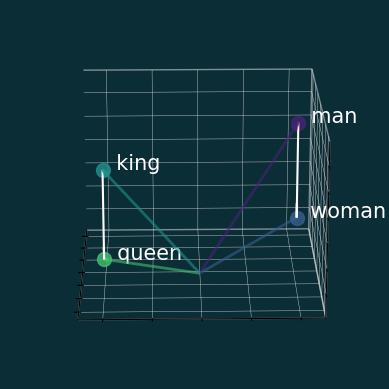

In [163]:
# Adjusting the plot to include opaque arrows from the origin to the individual words

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('#0B2D36')
ax.set_facecolor('#0B2D36')

# Reusing the same word embeddings with the downward direction
man = np.array([1, 2, 3.3])
woman = np.array([1, 2, 1.4])
king = np.array([1.5, -2, 2.5])
queen = np.array([1.5, -2, 0.7])


colors = viridis([0.1, 0.3, 0.5, 0.7, 0.3])
# Plotting the points
ax.scatter(man[0],   man[1],   man[2],   color=colors[0], s=100, label='man',   alpha=0.8)
ax.scatter(woman[0], woman[1], woman[2], color=colors[1], s=100, label='woman', alpha=0.8)
ax.scatter(king[0],  king[1],  king[2],  color=colors[2], s=100, label='king',  alpha=0.8)
ax.scatter(queen[0], queen[1], queen[2], color=colors[3], s=100, label='queen', alpha=0.8)

# Plotting the vectors with smaller arrow tips
ax.quiver(man[0], man[1], man[2], woman[0] - man[0], woman[1] - man[1], woman[2] - man[2], 
          color='white', linewidth=1.5, arrow_length_ratio=0.15)
ax.quiver(king[0], king[1], king[2], queen[0] - king[0], queen[1] - king[1], queen[2] - king[2], 
          color='white', linewidth=1.5, arrow_length_ratio=0.15)

# Plotting opaque arrows from the origin to each word
ax.quiver(0, 0, 0, man[0], man[1], man[2], color=colors[0], linewidth=2, arrow_length_ratio=0.05, alpha=0.6)
ax.quiver(0, 0, 0, woman[0], woman[1], woman[2], color=colors[1], linewidth=2, arrow_length_ratio=0.05, alpha=0.6)
ax.quiver(0, 0, 0, king[0], king[1], king[2], color=colors[2], linewidth=2, arrow_length_ratio=0.05, alpha=0.6)
ax.quiver(0, 0, 0, queen[0], queen[1], queen[2], color=colors[3], linewidth=2, arrow_length_ratio=0.05, alpha=0.6)

# Annotating the points
#ax.text(man[0], man[1], man[2], '  man', color='colors[0]', fontsize=15)
#ax.text(woman[0], woman[1], woman[2], '  woman', color=colors[1], fontsize=15)
#ax.text(king[0], king[1], king[2], '  king', color=colors[2], fontsize=15)
#ax.text(queen[0], queen[1], queen[2], '  queen', color=colors[3], fontsize=15)

ax.text(man[0],   man[1],   man[2],   '  man',   color='white', fontsize=15)
ax.text(woman[0], woman[1], woman[2], '  woman', color='white', fontsize=15)
ax.text(king[0],  king[1],  king[2],  '  king',  color='white', fontsize=15)
ax.text(queen[0], queen[1], queen[2], '  queen', color='white', fontsize=15)

# Set axis limits
ax.set_xlim([-3.4, 3.4])
ax.set_ylim([-2.4, 2.4])
ax.set_zlim([0.1, 3.4])

# Making the panes transparent
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Showing the grid on all axes
ax.xaxis._axinfo["grid"].update(color = 'lightgray', linewidth = 0.3)
ax.yaxis._axinfo["grid"].update(color = 'lightgray', linewidth = 0.3)
ax.zaxis._axinfo["grid"].update(color = 'lightgray', linewidth = 0.3)

# Removing the ticks
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_zticks([])


ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Set up the animation function with smooth transitions
def update(frame):
    ax.view_init(elev=20., azim=frame)

# Create animation
ani = animation.FuncAnimation(fig, update, frames=720, repeat=False)
ani.save('wordembedding.gif', writer='pillow', fps=24)
plt.show()


## Attention

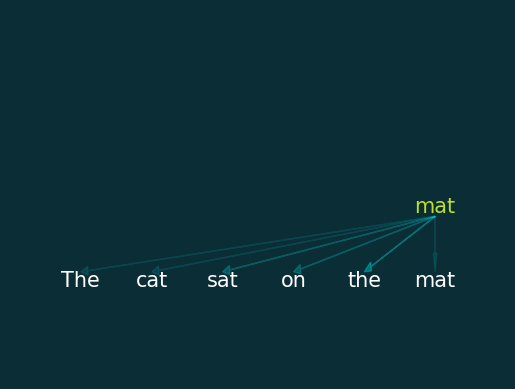

In [165]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Example sentence and corresponding attention weights for a single head
sentence = ["The", "cat", "sat", "on", "the", "mat"]
attention_weights = np.array([
    [0.1, 0.3, 0.2, 0.1, 0.2, 0.1],  # Attention weights for "The"
    [0.2, 0.1, 0.4, 0.1, 0.1, 0.1],  # Attention weights for "cat"
    [0.1, 0.2, 0.1, 0.3, 0.2, 0.1],  # Attention weights for "sat"
    [0.1, 0.1, 0.3, 0.1, 0.2, 0.2],  # Attention weights for "on"
    [0.2, 0.1, 0.2, 0.1, 0.1, 0.3],  # Attention weights for "the"
    [0.1, 0.1, 0.2, 0.2, 0.3, 0.1],  # Attention weights for "mat"
])

# Setting up the figure
fig, ax = plt.subplots()
fig.patch.set_facecolor('#0B2D36')
ax.set_facecolor('#0B2D36')

# Positions of words
word_positions = np.arange(len(sentence))
word_y_pos = np.zeros(len(sentence))

# Initial plot of words
words = []
for i, word in enumerate(sentence):
    words.append(ax.text(word_positions[i], word_y_pos[i], word, color='white', fontsize=15, ha='center'))

# Function to initialize the plot
def init():
    ax.set_xlim(-1, len(sentence))
    ax.set_ylim(-0.5, 1.5)
    ax.axis('off')

# Function to animate the attention mechanism
def animate(frame):
    ax.clear()
    init()
    
    # Highlight the word being attended to
    ax.text(word_positions[frame], word_y_pos[frame] + 0.4, sentence[frame], color=viridis(0.9), fontsize=15, ha='center')
    
    # Draw words
    for i, word in enumerate(sentence):
        words[i] = ax.text(word_positions[i], word_y_pos[i], word, color='white', fontsize=15, ha='center')
    
    # Draw arrows indicating attention
    for i in range(len(sentence)):
        ax.arrow(word_positions[frame], 0.38, #word_y_pos[frame], 
                 word_positions[i] - word_positions[frame], 
                 -0.3,color='cyan', alpha=attention_weights[frame, i], 
                 head_width=0.05, head_length=0.1, length_includes_head=True)

# Creating the animation and saving to prevent deletion
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(sentence), interval=1000, blit=False)
ani.save('attention.gif', writer='pillow', fps=1)
# Displaying the animation
plt.show()
